# This notebook contains the dataset of Salary Trends in Data-Related Careers.

**Our goal is to analyze this dataset to uncover insights into salary trends within the industry. We'll explore various factors that might influence salary, such as experience level, education, and geographic location. Additionally, we'll use statistical techniques and data visualization to present our findings clearly and effectively.**

In [215]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-in-data/jobs_in_data.csv


# importing dataset

In [216]:
d = pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')
d.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


# data preprocessing

In [217]:
d.shape

(9355, 12)

In [218]:
d.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [219]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


### checking for missing values

In [220]:
d.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

**no missing values found**

### unique data instances in the table

In [221]:
# Looking at all the unique data instances in the table
print("UNIQUE RECORDS IN DATA TABLE")
for i in d.columns:
    print('--'*38)
    print(i.upper())
    print(d[i].unique())

UNIQUE RECORDS IN DATA TABLE
----------------------------------------------------------------------------
WORK_YEAR
[2023 2022 2020 2021]
----------------------------------------------------------------------------
JOB_TITLE
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Busi

# EDA

### categorical and numerical features in the dataset

In [222]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through each column in the DataFrame
for col in d.columns:
    # Check if the column dtype is object (indicating categorical data)
    if d[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Print the lists of categorical and numerical column names
print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']

Numerical Columns:
['work_year', 'salary', 'salary_in_usd']


In [223]:
categorical_cols

['job_title',
 'job_category',
 'salary_currency',
 'employee_residence',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_location',
 'company_size']

In [224]:
numerical_cols

['work_year', 'salary', 'salary_in_usd']

### How many job vacancies in particular work year

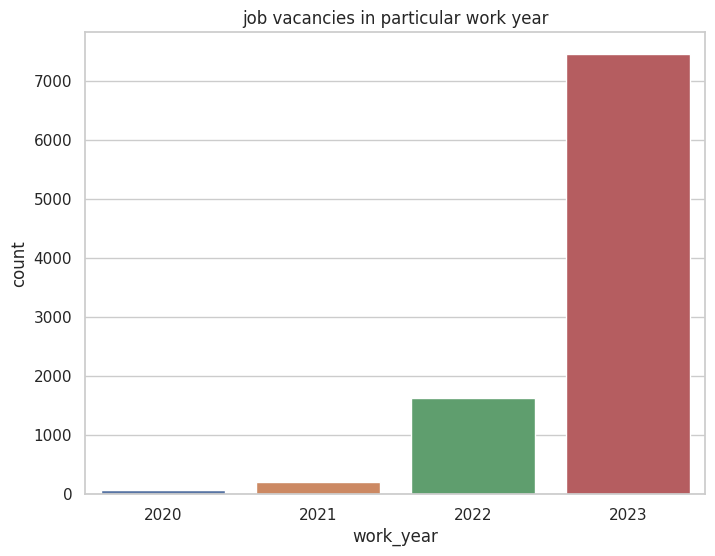

In [225]:
f, ax = plt.subplots(figsize=(8, 6))
sns.set(style = 'whitegrid')
sns.countplot(data = d ,x ='work_year') 
plt.title('job vacancies in particular work year')
plt.show()

**It shows In 2023 , Data field got boom with more than 6000 job vacancies.**

### Top 5 countries with job vacancies

In [226]:
top_5_countries = d['company_location'].value_counts().head()
top_5_countries

company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
Name: count, dtype: int64

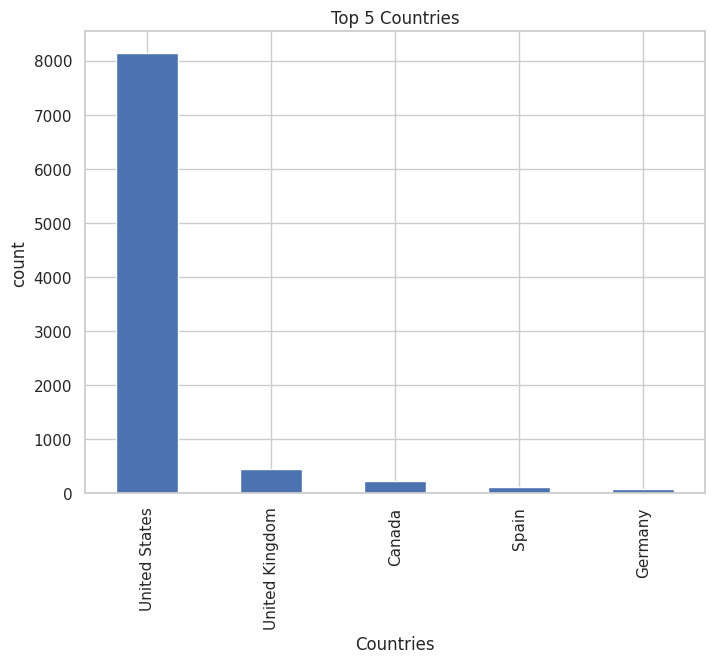

In [227]:
f, ax = plt.subplots(figsize=(8,6))
top_5_countries.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('count')
plt.title('Top 5 Countries')
plt.show()

**USA has the maximum of the job oppourtuniti**

### Job vacancies in particular work year wrt experience level

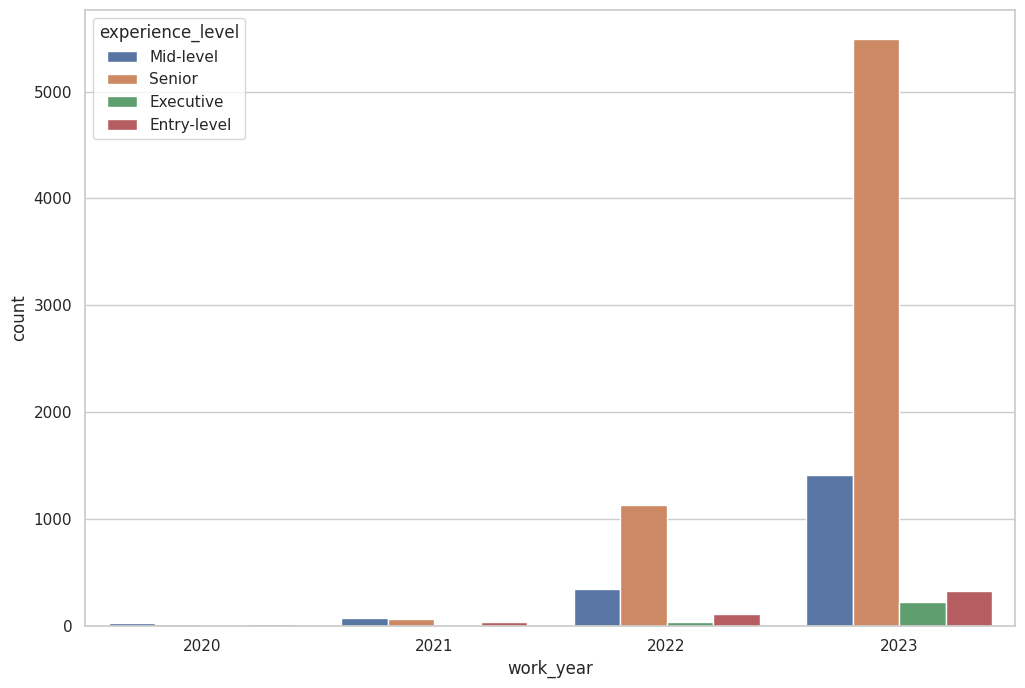

In [228]:
f, ax = plt.subplots(figsize=(12, 8))
sns.set(style = 'whitegrid')
sns.countplot(data = d ,x ='work_year', hue = 'experience_level') 
plt.show()

**More than 5000 job vacancies is for senior level, 1400 for Mid-level and around 300 for entry level candidates in 2023**

### Top 5 Job titles of 2023

In [229]:
d23 = d[d['work_year'] == 2023]
top_5 = d23['job_title'].value_counts().head(5)
top_5.head()

job_title
Data Engineer                1662
Data Scientist               1538
Data Analyst                 1091
Machine Learning Engineer     864
Applied Scientist             254
Name: count, dtype: int64

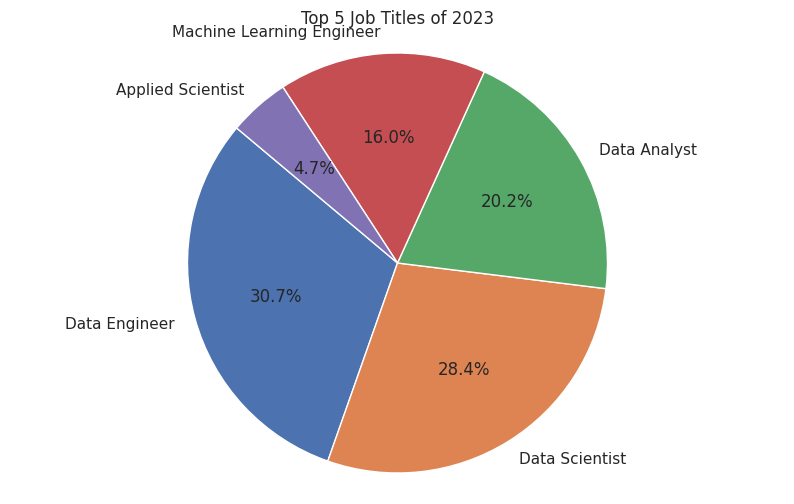

In [230]:
# Plotting
plt.figure(figsize=(10, 6))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Job Titles of 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Data Engineer along with Data Scientist and Data Analyst makes to the top 3 Job title of 2023**

### Distribution of company size

In [231]:
d['company_size'].value_counts()

company_size
M    8448
L     748
S     159
Name: count, dtype: int64

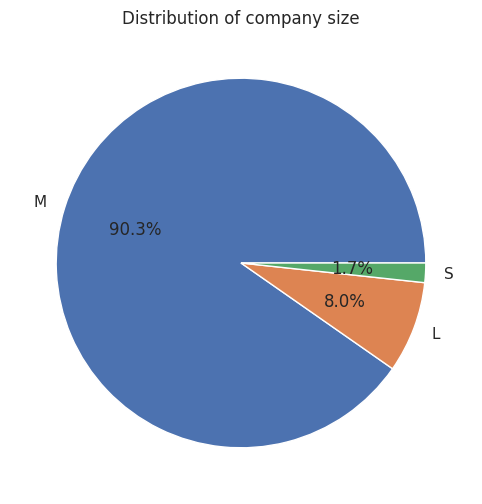

In [232]:
f, ax = plt.subplots(figsize=(8, 6))
d['company_size'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of company size')
plt.ylabel('')
plt.show()

**Most of the companies is of medium size**

### Distribution of work setting

In [233]:
d['work_setting'].value_counts()

work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64

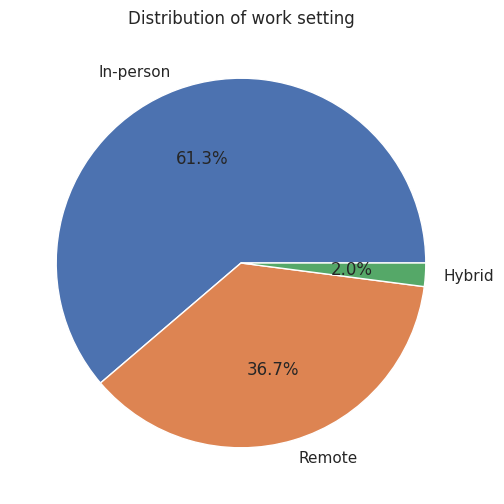

In [234]:
f, ax = plt.subplots(figsize=(8, 6))
d['work_setting'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of work setting')
plt.ylabel('')
plt.show()

**Working in person and remotely are mostly preffered in 2023**

### Which work setting is preffered by different sized companies?

In [235]:
d['company_size'].value_counts()

company_size
M    8448
L     748
S     159
Name: count, dtype: int64

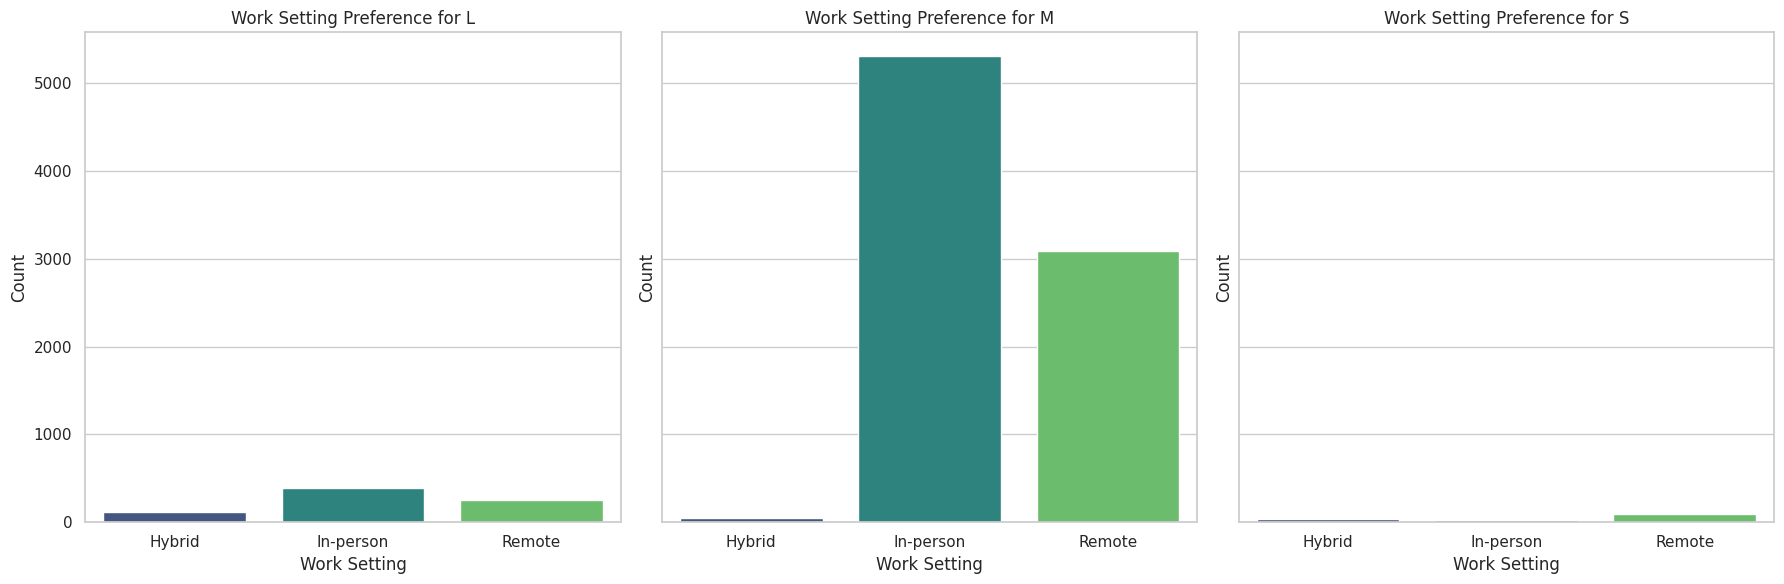

In [236]:
# Group by 'company_size' and 'work_setting' and calculate the count
work_setting_counts = d.groupby(['company_size', 'work_setting']).size().reset_index(name='COUNT')

# Pivot the table for better visualization
pivot_table = work_setting_counts.pivot_table(index='work_setting', columns='company_size', values='COUNT', fill_value=0)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 3 subplots for each company size category

for i, (company_size, data_subset) in enumerate(pivot_table.items()):
    sns.barplot(x=data_subset.index, y=data_subset.values, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Work Setting Preference for {company_size}')
    axes[i].set_xlabel('Work Setting')
    axes[i].set_ylabel('Count')
    
plt.tight_layout()
plt.show()

* **Work Setting for Medium Sized companies is mostly In-person with people with remote option.**
* **Work Setting for Large Sized companies is In-person along with remote option**
* **Work Setting for Small Sized companies is remote only**

### which job title has max salary

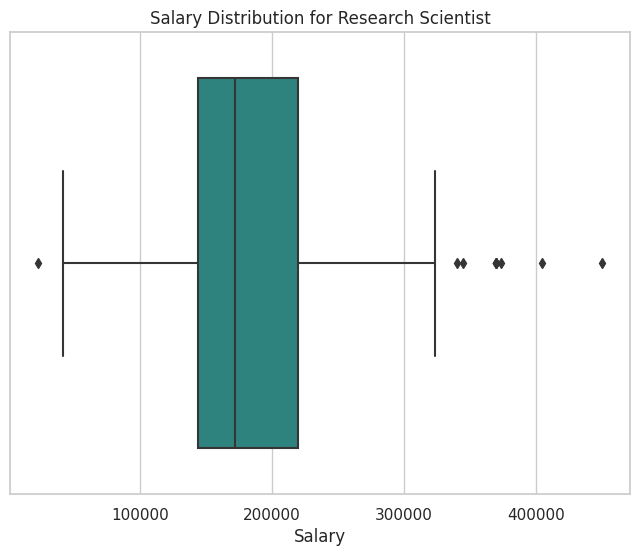

In [237]:
# Find the job title with the maximum salary
max_salary_job = d.loc[d['salary'].idxmax(), 'job_title']

# Filter data for the job title with the maximum salary
max_salary_data = d[d['job_title'] == max_salary_job]

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary', data=max_salary_data, palette="viridis")
plt.title(f'Salary Distribution for {max_salary_job}')
plt.xlabel('Salary')
plt.show()


### top 5 salary paying job title

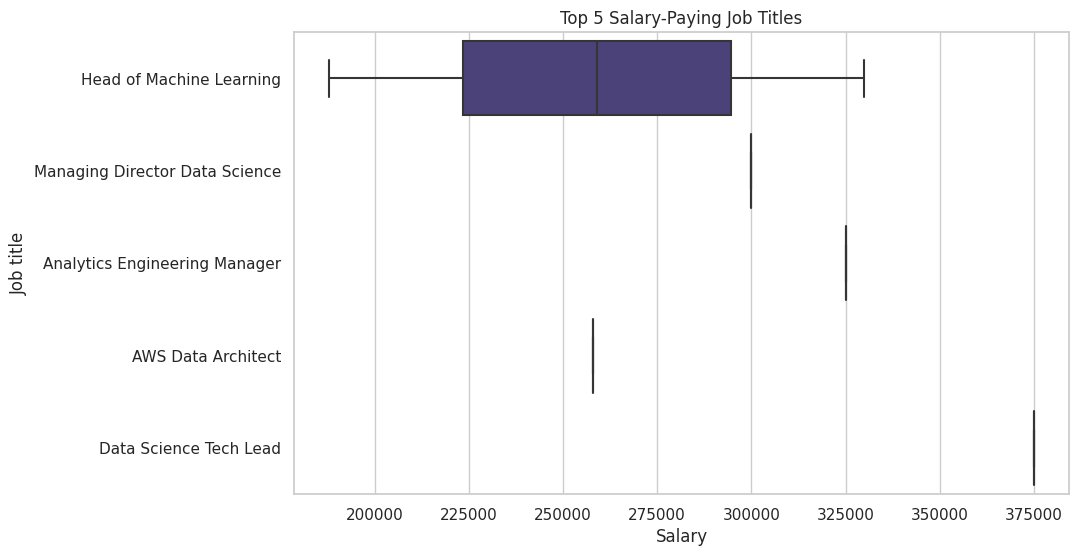

In [238]:
# Aggregate data to find the average salary for each job title
avg_salary_by_job = d.groupby('job_title')['salary'].mean().reset_index()

# Sort job titles by average salary and select the top 5
top_5_job_titles = avg_salary_by_job.sort_values(by='salary', ascending=False).head(5)

# Filter data for the top 5 job titles
top_5_data = d[d['job_title'].isin(top_5_job_titles['job_title'])]

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', y='job_title', data=top_5_data, palette="viridis")
plt.title('Top 5 Salary-Paying Job Titles')
plt.xlabel('Salary')
plt.ylabel('Job title')
plt.show()

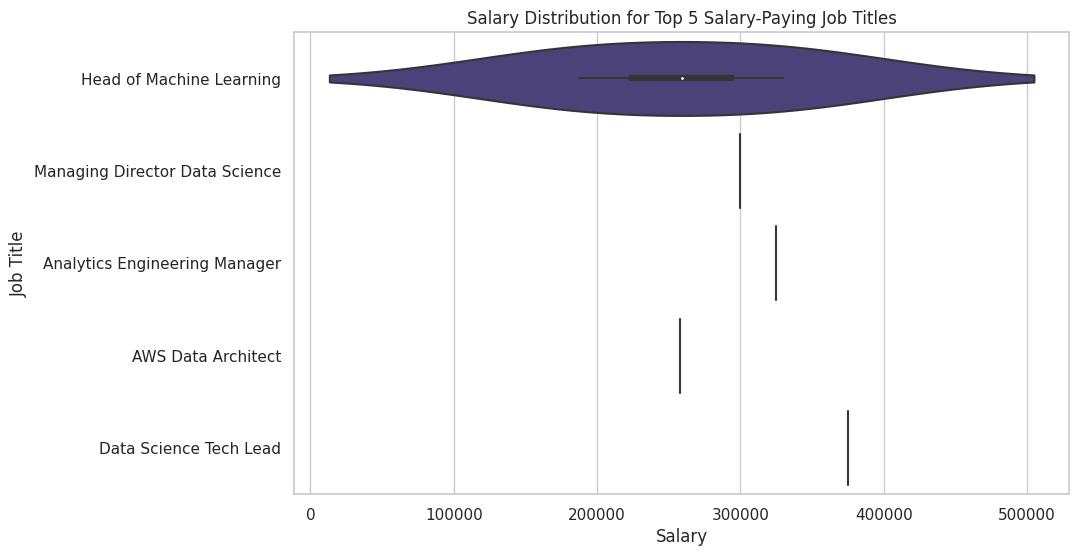

In [239]:
# Aggregate data to find the average salary for each job title
avg_salary_by_job = d.groupby('job_title')['salary'].mean().reset_index()

# Sort job titles by average salary and select the top 5
top_5_job_titles = avg_salary_by_job.sort_values(by='salary', ascending=False).head(5)

# Filter data for the top 5 job titles
top_5_data = d[d['job_title'].isin(top_5_job_titles['job_title'])]

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='salary', y='job_title', data=top_5_data, palette="viridis")
plt.title('Salary Distribution for Top 5 Salary-Paying Job Titles')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.show()


### which sized company hiring for which employment type 

In [240]:
d['employment_type'].value_counts()

employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64

In [241]:
d.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


<Figure size 1200x800 with 0 Axes>

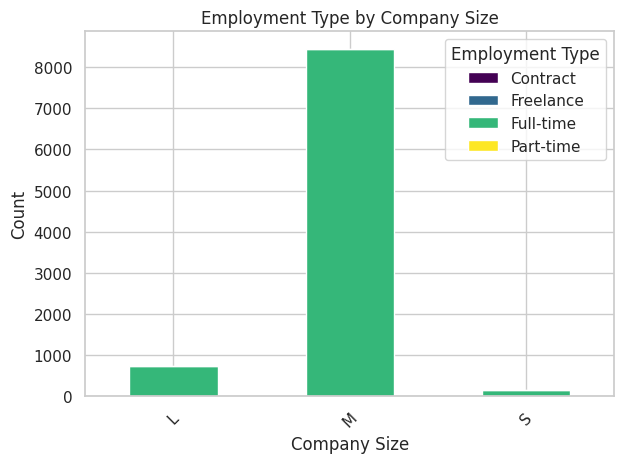

In [242]:
# Group by 'Company Size' and 'Employment Type' and calculate the count
employment_type_counts = d.groupby(['company_size', 'employment_type']).size().reset_index(name='Count')

# Pivot the table for better visualization
pivot_table = employment_type_counts.pivot_table(index='company_size', columns='employment_type', values='Count', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Employment Type by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

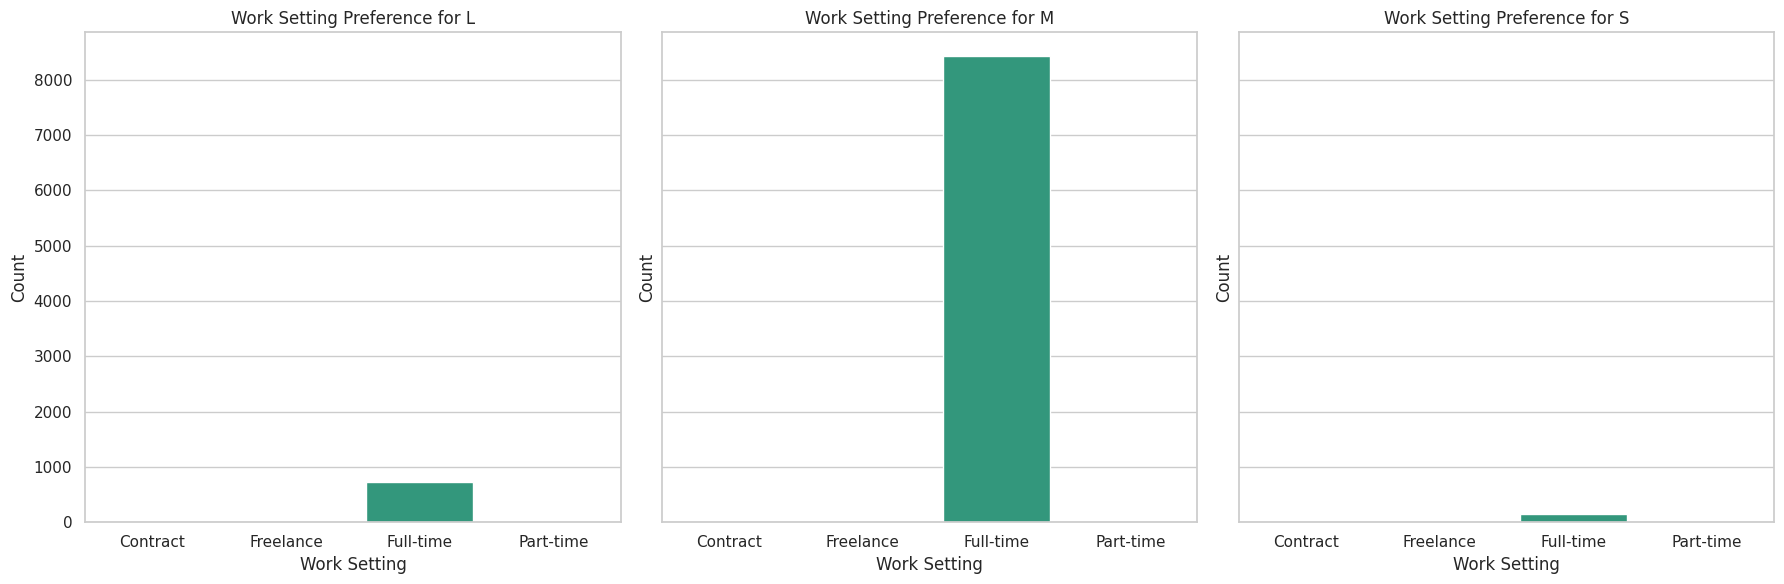

In [243]:
# Group by 'company_size' and 'work_setting' and calculate the count
work_setting_counts = d.groupby(['company_size', 'employment_type']).size().reset_index(name='COUNT')

# Pivot the table for better visualization
pivot_table = work_setting_counts.pivot_table(index='employment_type', columns='company_size', values='COUNT', fill_value=0)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 3 subplots for each company size category

for i, (company_size, data_sub) in enumerate(pivot_table.items()):
    sns.barplot(x=data_sub.index, y=data_sub.values, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Work Setting Preference for {company_size}')
    axes[i].set_xlabel('Work Setting')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [246]:
d.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### Maximum entry level jobs in which job category

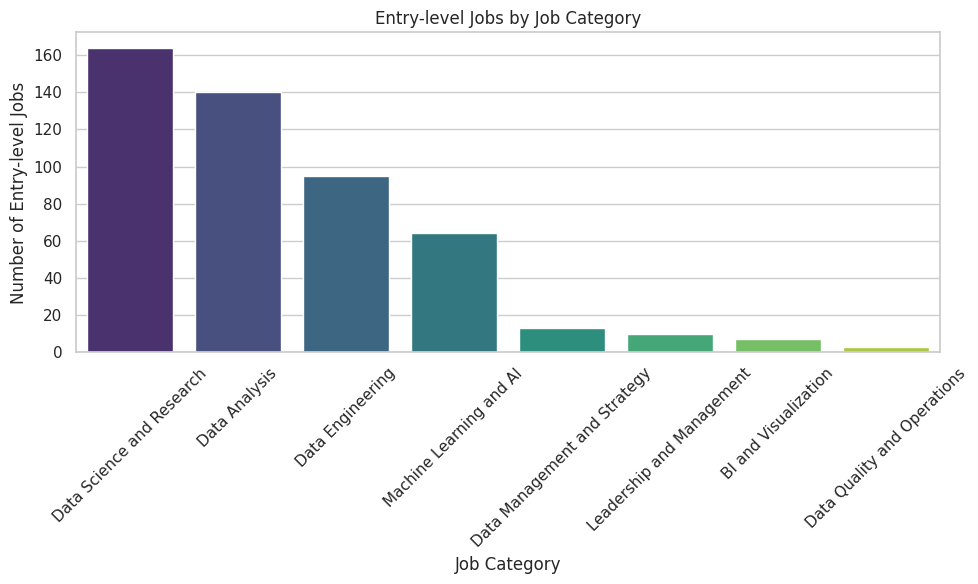

In [254]:
# Filter data for "Entry-level" employment type
entry_level_data = d[d['experience_level'] == "Entry-level"]

# Group by job category and calculate the count
job_category_counts = entry_level_data['job_category'].value_counts()

# Find the job category with the maximum number of Entry-level jobs
max_entry_level_job_category = job_category_counts.idxmax()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=job_category_counts.index, y=job_category_counts.values, palette="viridis")
plt.title(f'Entry-level Jobs by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Entry-level Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
